# Finding the Transition state

We will first optimize our transition state guess keeping the C-Cl distance fixed. 

First, lets import some modules

In [1]:
import psi4
from helpers import show_normal_modes

import ipywidgets
from ipywidgets import interact, interactive, fixed, widgets
import py3Dmol

import numpy as np
import matplotlib.pyplot as plt

Set ressource usage

In [2]:
psi4.set_num_threads(2)
psi4.set_memory('2 GB')

2000000000

Define TS guess

In [3]:
ts_guess = psi4.geometry("""
-1 1
 symmetry c1
 c
 c   1 cc2
cl    1 clc3        2 clcc3
 h    1 hc4         2 hcc4          3 dih4
 c    1 cc5         2 ccc5          3 dih5
 o    2 oc6         1 occ6          3 dih6
 h    2 hc7         1 hcc7          6 dih7
 h    2 hc8         1 hcc8          6 dih8
 h    5 hc9         1 hcc9          2 dih9
 h    5 hc10        1 hcc10         9 dih10
 h    5 hc11        1 hcc11         9 dih11
cc2     =    1.500000
clc3    =    2.400000
clcc3   =    109.471
hc4     =    1.089000
hcc4    =    109.471
dih4    =    100.000
cc5     =    1.500000
ccc5    =    109.471
dih5    =   -100.000
oc6     =    1.430000
occ6    =     80.000
dih6    =    180.000
hc7     =    1.070000
hcc7    =    109.471
dih7    =    120.000
hc8     =    1.070000
hcc8    =    109.471
dih8    =    240.000
hc9     =    1.070000
hcc9    =    109.471
dih9    =    180.000
hc10    =    1.070000
hcc10   =    109.471
dih10   =    120.000
hc11    =    1.070000
hcc11   =    109.471
dih11   =    240.000
""")


# Constrained optimization

In [4]:
psi4.core.set_output_file(f'poxide.log', False)
psi4.set_options({"frozen_distance":"1 3"})
psi4.optimize('b3pw91/6-31+G*', molecule=ts_guess)

Optimizer: Optimization complete!


-653.2420054380134

So now we have our optimized transition state guess. Now we want to find out whether we this guess is close to the transition state (meaning it has one imaginary frequency) and then optimize to the actual transition state. 

If we set `full_hess_every` to `0` a frequency calculation will be performed at the begining (you could also do it seperately using `psi4.frequency([..])`. By setting `opt_type` to `ts` the optimization will try to find the 1st order saddlepoint that is the transition state. 

We will write the normal modes to a file for visualization. 

In [5]:
ts = ts_guess.clone()
psi4.core.clean_options()

psi4.core.set_output_file(f'ts.log', False)
psi4.set_options({
    "opt_type":"ts",
    "geom_maxiter":100, 
    "full_hess_every":0,
    "normal_modes_write": True
    })

psi4.optimize('b3pw91/6-31+G*', molecule=ts)


 55 displacements needed.
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
Optimizer: Optimization complete!


-653.240347978187

We can also compare the TS with the guess to see how far of we are. 

<span style="background:yellow">TS</span> <span style="background:gray">TS Guess</span>

In [6]:
view = py3Dmol.view(width=400, height=400)
view.addModel(ts_guess.save_string_xyz_file(), "xyz")
view.addModel(ts.save_string_xyz_file(), "xyz")
view.setStyle({'stick':{}, 'sphere':{'scale':0.1}})
view.setStyle({'model':0},{'stick':{'colorscheme':'yellowCarbon'}, 'sphere':{'scale':0.1}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

```{admonition} Exercise 2
:class: exercise
Take a screenshot of the spectrum and note the imaginary vibrational
    mode. What motion is this mode related to? Do the same for two real
    vibrational modes of your choice.
```

```{admonition} Exercise 1
:class: exercise
Take a screenshot of the optimised transition state structure. How did the structure change with respect to the constrained-optimised guess?
```

In [7]:
# ts_freq = ts.clone()

In [8]:
# #psi4.core.clean_options()

# psi4.core.set_output_file(f'ts_freq.log', False)
# psi4.set_options({"normal_modes_write": True})

# E, wfn = psi4.frequency('b3pw91/6-31+G*', molecule=ts_freq, return_wfn=True)

# gradient = wfn.gradient()

In [9]:
# check how the file is named
!ls -lrth ts.*.molden_normal_modes

-rw-r--r-- 1 duerr software 21K Jul  7 17:53 ts.default.11195.molden_normal_modes


Now we can visualize the normal modes (you need to modify the name of the file). The first (negative) normal mode should correspond to the movement characterizing the transition from reactant to product.

In [11]:
# change XXX to correct number from above command
show_normal_modes(filename='ts.default.11195.molden_normal_modes')

interactive(children=(Dropdown(description='Normal mode:', options=((-379.9937881001, 0), (77.1095134233, 1), …

```{admonition} Exercise 2
:class: exercise
Is the transition state you predicted an early or a late transition state?
```

```{admonition} Exercise 3
:class: exercise
Having found a transition state, how would you now obtain the barrier height for your reaction?
```

```{admonition} Exercise 4
:class: exercise
Are there ways of verifying whether you have found a meaningful
    transition state? **Bonus:** How would you define 'meaningful' in
    this context?
```

In [12]:
ts.save_string_xyz_file()

'11\n\n C    0.161277652442   -0.511659237977   -0.065756263639\n C    0.161277652442   -0.511659237977    1.409959596277\nCL    0.161277652442    1.675674177759   -0.829742424050\n H    1.132438279891   -0.697673060564   -0.509095183799\n C   -1.040792304165   -1.016986818226   -0.814824998096\n O    0.358115777284   -1.869113056275    1.405395111665\n H    0.973976046119    0.103377254213    1.848144294988\n H   -0.802731568808   -0.160202392616    1.838575231274\n H   -0.948171371421   -0.797953163311   -1.882592940287\n H   -1.131686555465   -2.098706543170   -0.669893259669\n H   -1.951363511575   -0.532540703580   -0.443136552538\n'

Lets check again that our TS is a good one by performing a frequency calculation. 
We will save the wfn as well because we want to use the hessian to speed up our IRC search. 


In [32]:
psi4.core.clean_options()
E, wfn = psi4.frequency('b3pw91/6-31+G*', molecule=ts, return_wfn=True)

 55 displacements needed.
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55


In [33]:
backward = ts.clone()
forward = ts.clone()

Optimizer: Optimization complete!


Optimizer: Optimization complete!


# IRC

As psi4 updates the molecule geometry when optimizing we make two copies for the product and reactant and then we use `irc` to follow the intrinsic reaction coordinate. 

A transition state search merely guarantees that one reaches a
first-order saddle point on the PES; there is, however, no guarantee
that it is really linked to the reactant and product. (For instance,
there may be further transition states lying in between.) Although the
visualisation of the imaginary vibrational mode may give some hint as to
whether one has found a reasonable saddle point, this information is not
sufficient to guarantee a connection to the reactant and product well.
Following the negative Hessian eigenvalues from the transition state to
the next local minimum, on the other hand, will immediately reveal
whether such a connection exists. This Hessian-following in
mass-weighted coordinates is referred to as a search along the
*Intrinsic Reaction Coordinate* (IRC). This search will create a
potential energy profile for the reaction, as well as a trajectory that
visualises the lowest energy path from reactant to TS to product. 

In this last exercise session, you will verify whether the transition state
you computed in the last exercise is the proper state that connects your
starting material to the product, and you will build the reaction
profile and visualize it.

In [31]:
backward = ts.clone()
forward = ts.clone()

## Backward

First, let's optimize towards the reactant

In [14]:
psi4.core.set_output_file(f'irc_backward.log', False)
psi4.set_options({
     "geom_maxiter":500,
     "full_hess_every":-1, 
     "opt_type":"irc",
     "irc_step_size":0.25,
     "ensure_bt_convergence":True,
     "cart_hess_read":True,
     "irc_direction":"backward",
     })

E, history_backward = psi4.optimize('b3pw91/6-31+G*',molecule=backward, return_history=True, ref_gradient=wfn.gradient())

 55 displacements needed.
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
Optimizer: Optimization complete!


## Forward

In [15]:
psi4.core.set_output_file(f'irc_forward.log', False)
psi4.set_options({
     "geom_maxiter":500,
     "full_hess_every":-1, 
     "opt_type":"irc",
     "irc_step_size":0.25,
     "ensure_bt_convergence":True,
     "cart_hess_read":True,
     "irc_direction":"forward",
     })


E, history_forward = psi4.optimize('b3pw91/6-31+G*',molecule=forward, return_history=True, ref_gradient=wfn.gradient())

 55 displacements needed.
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
Optimizer: Optimization complete!


In [36]:
coordinates_forward = history_forward['coordinates']
energies_forward = history_forward['energy']
coordinates_backward = history_backward['coordinates']
energies_backward = history_backward['energy']

In [37]:
def drawXYZGeomNum(geom, conf):
    view = py3Dmol.view(width=400, height=400)
    view.addModel(geom[conf], "xyz")
    view.setStyle({'stick':{}, 'sphere':{'scale':0.1}})
    view.zoomTo()
    return(view.show())

def drawXYZGeomSlider(geom):
    interact(drawXYZGeomNum, geom=fixed(geom), conf=widgets.IntSlider(min=0, max=len(geom)-1, step=1))



In [38]:
hartree2A = 0.52917721067121
forward_e = [energy * psi4.constants.hartree2kcalmol for energy in energies_forward ]
backward_e = [energy * psi4.constants.hartree2kcalmol for energy in energies_backward]


backward_e.reverse()

forward_e = np.array(forward_e)-np.max(forward_e)
backward_e = np.array(backward_e)-np.max(backward_e)

In [39]:
energies = np.concatenate([backward_e[:-2],forward_e], axis=0)

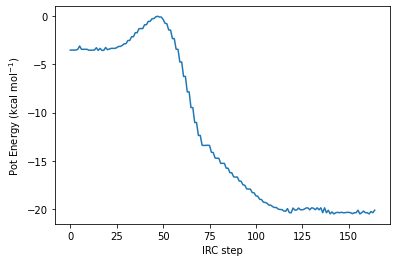

In [40]:
fig, ax =  plt.subplots(1)

ax.plot(energies)
ax.set_xlabel('IRC step')
ax.set_ylabel('Pot Energy (kcal mol$^{-1}$)')


plt.show()

In [21]:
coordinates_backward.reverse()

coordinates = coordinates_backward + coordinates_forward

In [22]:
elements = ts.to_dict()['elem']
traj = []
for coords in coordinates:
    coords = np.array(coords)
    coords*= hartree2A 
    xyz =f"{len(coords)}\n\n"
    for i in range(len(coords)):
        xyz+=f"{elements[i]} {coords[i][0]} {coords[i][1]} {coords[i][2]} \n"
    traj.append(xyz)

In [23]:
drawXYZGeomSlider(traj)

interactive(children=(IntSlider(value=0, description='conf', max=172), Output()), _dom_classes=('widget-intera…

In [24]:
def calculate_dihedral(a, b, c, d):
    """Calculates dihedral from cartesian coordinates"""
    b0 = -1.0*(b - a)
    b1 = c - b
    b2 = d - c
    # normalize b1
    b1 /= np.linalg.norm(b1)
    # v = projection of b0 onto plane perpendicular to b1
    #   = b0 minus component that aligns with b1
    # w = projection of b2 onto plane perpendicular to b1
    #   = b2 minus component that aligns with b1
    v = b0 - np.dot(b0, b1)*b1
    w = b2 - np.dot(b2, b1)*b1
    # angle between v and w in a plane is the torsion angle
    # v and w may not be normalized but that's fine since tan is y/x
    x = np.dot(v, w)
    y = np.dot(np.cross(b1, v), w)
    return np.degrees(np.arctan2(y, x))

def calculate_angle(a,b,c):
    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

def calculate_bond(a,b):
    ba = a - b
    return np.linalg.norm(ba)

```{admonition} Exercise
:class: exercise
How do the C-Cl and the two relevant C-O bond lengths change during
    the trajectory? Does the C-C bond in the ring contract as the
    epoxide is formed? Show a graph depicting the evolution of these
    parameters as the reaction progresses. (Hit `2` to select bond
    lengths, and use `Graphics` (*VMD Main*), `Labels` and `Graph`
    (*Labels* Menu) to visualise the changes, just as you did in the PES
    scan of butane.)
```

```{admonition} Exercise
:class: exercise
What is happening to the methyl group as the reaction proceeds? Find
    a suitable parameter (angle, dihedral) to describe and characterise
    possible changes you observe. (Hit `3` to select angles, or `4` for
    dihedrals.)
```

```{admonition} Exercise
:class: exercise
Is the stereochemistry at the carbon at which the reaction takes
    place retained?
```

```{admonition} Exercise
:class: exercise
Take a screenshot of the graph of the potential energy profile you
    recorded. Make sure that the left half corresponds to the reactants,
    and that the product state can be found to the right.
```

```{admonition} Exercise
:class: exercise
Why is the barrier for the epoxide formation so low? Will this be
    the overall barrier for the reaction as depicted in section 8.1?
```

In [25]:
r = forward.to_arrays()[0] * hartree2A 
p = backward.to_arrays()[0] * hartree2A 

In [27]:
view = py3Dmol.view(width=400, height=400)
view.addModel(ts.save_string_xyz_file(), "xyz")

for i,(x,y,z) in enumerate(p):
    view.addLabel(str(i),{'position':{'x':x,'y':y,'z':z},'inFront':True})
view.setStyle({'stick':{}, 'sphere':{'scale':0.1}})
view.setStyle({'model':0},{'stick':{'colorscheme':'yellowCarbon'}, 'sphere':{'scale':0.1}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [28]:
calculate_bond(p[0],p[5])
calculate_bond(p[1],p[5])

1.3373569398205571

In [29]:
calculate_angle(p[2],p[0], p[4])

107.53543298422461

In [30]:
calculate_dihedral(p[10],p[4],p[0], p[2])

-59.70820468514368